In [14]:
projPath_load='/home/alvaro/notebook/jupyterenv/bin/TFM/CODIGO/test_tfm_code_test/ATURAT_TAULA_DEF.csv'

In [84]:
projPath_save='/home/alvaro/notebook/jupyterenv/bin/TFM/CODIGO/test_tfm_code_test/'

In [3]:
month = '202206'
darsena = '_DM'

In [4]:
buffer_basin = 20 #m
buffer_dock = 30 #m
buffer_basin1 = 150 #m

min_points = 10

In [5]:
import numpy as np
import pandas as pd

import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import medfilt

In [6]:
from sklearn.cluster import KMeans

In [69]:
from sklearn.metrics import silhouette_score

In [7]:
%matplotlib notebook

In [8]:
moll_map = gpd.read_file('/home/alvaro/notebook/jupyterenv/bin/TFM/22-23_Maniobres-20221022T161922Z-001/22-23_Maniobres/data/maps/MollsDarsenaMorrot_noTalo.shp')
dm_map = gpd.read_file('/home/alvaro/notebook/jupyterenv/bin/TFM/22-23_Maniobres-20221022T161922Z-001/22-23_Maniobres/data/maps/DarsenaMorrot.shp')

In [9]:
dm_map.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
dm_buffer = gpd.GeoDataFrame(geometry = dm_map.to_crs(32631).buffer(buffer_basin).to_crs(4326))
dm_buffer.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
dm_buffer_z2 = gpd.GeoDataFrame(geometry = dm_map.to_crs(32631).buffer(buffer_basin1).to_crs(4326))
dm_buffer_z2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
moll_buffer = gpd.GeoDataFrame(geometry = moll_map.to_crs(32631).buffer(buffer_dock, cap_style = 2,join_style = 2).to_crs(4326))

<IPython.core.display.Javascript object>


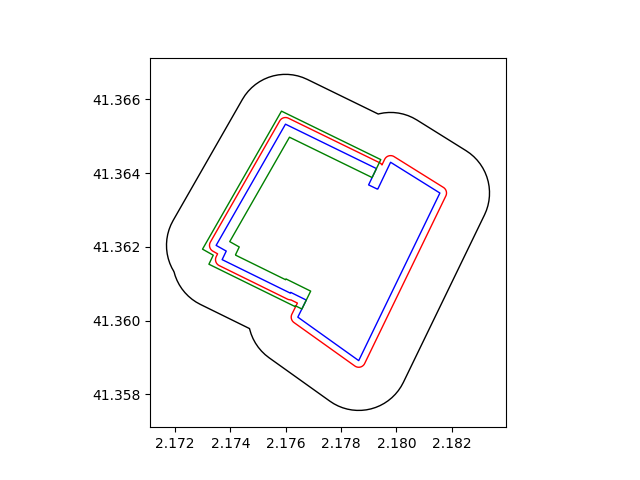

<AxesSubplot:>

In [13]:
fig, ax = plt.subplots()
dm_map.plot(ax = ax, fc = 'none', ec = 'blue')
dm_buffer.plot(ax = ax, fc = 'none', ec = 'red')
moll_buffer.plot(ax = ax, fc = 'none', ec = 'green')
dm_buffer_z2.plot(ax = ax, fc = 'none', ec = 'black')

# Load Data

In [15]:
dfA_n2=pd.read_csv(projPath_load)

In [16]:
len(dfA_n2)

70

In [17]:
dfA_n2

,mmsi,index_maniobra,tipus,inici,fi,lat,lon
0,209115000,0,parat,10074,10928,41.364478,2.177592
1,209115000,1,parat,30599,30728,41.364475,2.177594
2,209115000,2,parat,31430,31589,41.364474,2.177589
3,210117000,0,parat,40228,40266,41.364162,2.178765
4,247219400,0,parat,1273,2420,41.363832,2.175074
...,...,...,...,...,...,...,...
65,247383600,4,parat,31816,31902,41.364774,2.177328
66,247383600,5,parat,37382,37521,41.364774,2.177332
67,247383600,6,parat,39428,39481,41.364774,2.177332
68,247383600,7,parat,44551,44654,41.364780,2.177327


<IPython.core.display.Javascript object>


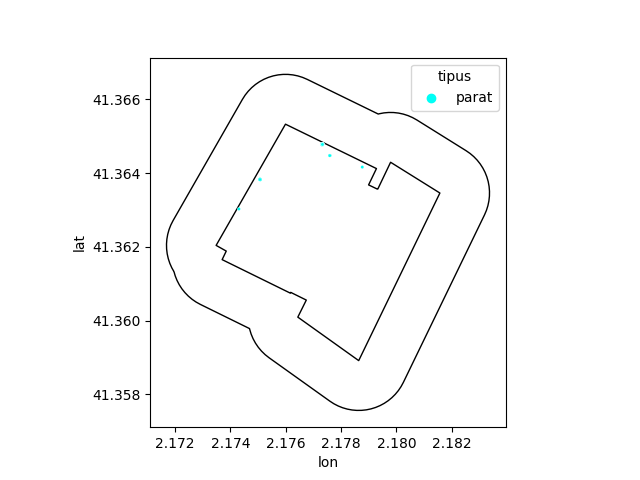

<AxesSubplot:xlabel='lon', ylabel='lat'>

In [26]:
fig, ax = plt.subplots()
dm_buffer_z2.plot(ax = ax, fc = 'none', ec = 'black')
dm_map.plot(ax = ax, fc = 'none', ec = 'black')
sns.scatterplot(data = dfA_n2, x = 'lon',y = 'lat', s = 5, hue = 'tipus', palette = 'hsv')

# Silhouette Method

In [ ]:
df_t=dfA_n2.loc[:,['lat','lon']].copy()

<IPython.core.display.Javascript object>


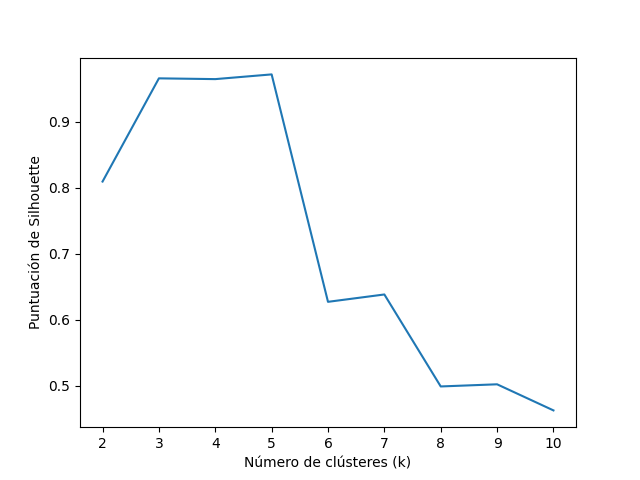

In [70]:
# Inicializar una lista para almacenar los valores de Silhouette
silhouette_scores = []

# Ajustar KMeans para k valores de 2 a 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_t)
    score = silhouette_score(df_t, kmeans.labels_)
    silhouette_scores.append(score)

# Graficar la curva de Silhouette en función de k
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Puntuación de Silhouette')
plt.show()

# Seleccionar el valor de k que maximiza la puntuación de Silhouette
best_k = silhouette_scores.index(max(silhouette_scores)) + 2


In [71]:
best_k

5

# k-menas

In [62]:
clustering=KMeans(n_clusters = 5, max_iter=200)
clustering.fit(df_t)

KMeans(max_iter=200, n_clusters=5)

In [63]:
df_t['test']=clustering.labels_

In [64]:
df_t.test.unique()

array([4, 2, 1, 0, 3], dtype=int32)

<IPython.core.display.Javascript object>


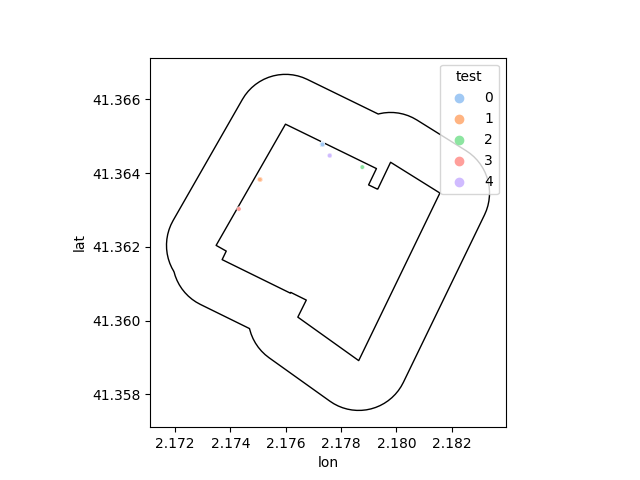

<AxesSubplot:xlabel='lon', ylabel='lat'>

In [67]:
fig, ax = plt.subplots()
dm_buffer_z2.plot(ax = ax, fc = 'none', ec = 'black')
dm_map.plot(ax = ax, fc = 'none', ec = 'black')
sns.scatterplot(data = df_t, x = 'lon',y = 'lat', s = 10, hue = 'test', palette = 'pastel')

In [79]:
dfA_n2['punt'] = df_t['test']

In [80]:
dfA_n2

,mmsi,index_maniobra,tipus,inici,fi,lat,lon,punt
0,209115000,0,parat,10074,10928,41.364478,2.177592,4
1,209115000,1,parat,30599,30728,41.364475,2.177594,4
2,209115000,2,parat,31430,31589,41.364474,2.177589,4
3,210117000,0,parat,40228,40266,41.364162,2.178765,2
4,247219400,0,parat,1273,2420,41.363832,2.175074,1
...,...,...,...,...,...,...,...,...
65,247383600,4,parat,31816,31902,41.364774,2.177328,0
66,247383600,5,parat,37382,37521,41.364774,2.177332,0
67,247383600,6,parat,39428,39481,41.364774,2.177332,0
68,247383600,7,parat,44551,44654,41.364780,2.177327,0


<IPython.core.display.Javascript object>


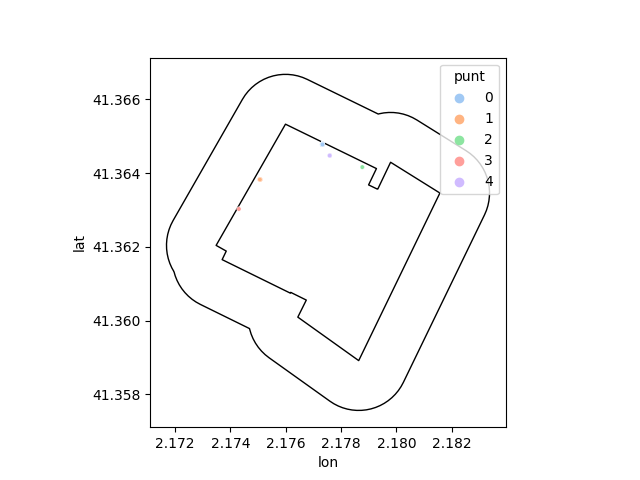

<AxesSubplot:xlabel='lon', ylabel='lat'>

In [81]:
fig, ax = plt.subplots()
dm_buffer_z2.plot(ax = ax, fc = 'none', ec = 'black')
dm_map.plot(ax = ax, fc = 'none', ec = 'black')
sns.scatterplot(data = dfA_n2, x = 'lon',y = 'lat', s = 10, hue = 'punt', palette = 'pastel')

# SAVE DATA

In [85]:
dfA_n2.to_csv(projPath_save +'ATURAT_TAULA_DEF_clusters.csv', index = False, columns = ['mmsi', 'index_maniobra', 'tipus', 'inici', 'fi', 'lat', 'lon', 'punt'])